In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./data/Barley.data.csv')
df.head()

Predictor       740       741       742       743       744       745   
0     HB-52  1.499853  1.500665  1.501564  1.502536  1.503537  1.504548  \
1     HB-52  1.530877  1.531669  1.532524  1.533419  1.534308  1.535169   
2     HB-52  1.607175  1.608642  1.610044  1.611357  1.612540  1.613585   
3     HB-52  1.677333  1.678098  1.678930  1.679809  1.680688  1.681539   
4     HB-52  1.507830  1.509293  1.510683  1.511977  1.513145  1.514180   

        746       747       748  ...      1061      1062      1063      1064   
0  1.505588  1.506689  1.507828  ...  1.636411  1.637350  1.636452  1.634370  \
1  1.536024  1.536916  1.537830  ...  1.643299  1.644222  1.643302  1.641195   
2  1.614534  1.615456  1.616359  ...  1.703343  1.704291  1.703329  1.701137   
3  1.682384  1.683260  1.684145  ...  1.755067  1.756013  1.754996  1.752716   
4  1.515125  1.516049  1.516964  ...  1.641968  1.642877  1.641946  1.639829   

       1065      1066      1067      1068      1069      1070  
0  1.632287  1.630265  1.630722  1.633166  1.636204  1.637872  
1  1.639088  1.637046  1.637493  1.639938  1.642981  1.644649  
2  1.698946  1.696822  1.697278  1.699806  1.702953  1.704677  
3  1.750441  1.748238  1.748696  1.751290  1.754525  1.756294  
4  1.637714  1.635664  1.636101  1.638535  1.641567  1.643227  

[5 rows x 332 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 332 entries, Predictor to 1070
dtypes: float64(331), object(1)
memory usage: 3.0+ MB


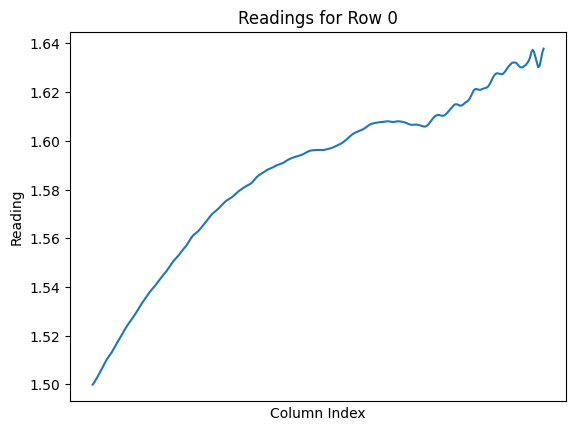

In [4]:
row_index = 0  
row_data = df.iloc[row_index, 1:] 
plt.plot(row_data)
plt.xlabel('Column Index')
plt.ylabel('Reading')
plt.title('Readings for Row {}'.format(row_index))
plt.xticks([]) 
plt.show()

## Label encoding predictor column

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(df.Predictor)

label_mapping = dict(zip(encoded_labels, df.Predictor))
sorted_label_mapping = dict(sorted(label_mapping.items()))
df['ePred'] = encoded_labels
sorted_label_mapping

{0: ' Ardu 1260 B',
 1: ' Bahati',
 2: ' Bekoji-1',
 3: ' Cross 41/98',
 4: ' Deribe',
 5: ' Dimtu',
 6: ' EH 1493',
 7: ' EH 1847',
 8: ' Explorer',
 9: ' Grace',
 10: ' HB-1307',
 11: ' HB-1533',
 12: ' HB-1963',
 13: ' HB-1964',
 14: ' HB-1965',
 15: ' HB-1966',
 16: ' IBON 174/03',
 17: ' Sabini',
 18: ' Shege',
 19: ' Traveller',
 20: 'Beka',
 21: 'HB-52',
 22: 'Holker',
 23: 'Misccal-21'}

In [6]:
print(df[['ePred','Predictor']].head(5))
df.Predictor.value_counts() 
# We can see that we have 50 samples for each crop type

   ePred Predictor
0     21     HB-52
1     21     HB-52
2     21     HB-52
3     21     HB-52
4     21     HB-52


Predictor
HB-52           50
 HB-1965        50
 Bekoji-1       50
 IBON 174/03    50
 HB-1533        50
Holker          50
Beka            50
 Cross 41/98    50
 Sabini         50
Misccal-21      50
 HB-1307        50
 HB-1966        50
 Shege          50
 EH 1847        50
 HB-1963        50
 Deribe         50
 Explorer       50
 HB-1964        50
 Traveller      50
 EH 1493        50
 Ardu 1260 B    50
 Grace          50
 Bahati         50
 Dimtu          50
Name: count, dtype: int64

In [7]:
mean_df = df.drop('ePred', axis=1).groupby('Predictor').mean()
mean_df.head()

740       741       742       743       744       745   
Predictor                                                                  
 Ardu 1260 B  1.577496  1.577690  1.577841  1.578030  1.578325  1.578771  \
 Bahati       1.567367  1.567273  1.567086  1.567008  1.567138  1.567525   
 Bekoji-1     1.634669  1.634352  1.633926  1.633793  1.634089  1.634845   
 Cross 41/98  1.583509  1.583463  1.583216  1.583144  1.583395  1.584031   
 Deribe       1.576465  1.577283  1.578104  1.578903  1.579673  1.580423   

                   746       747       748       749  ...      1061      1062   
Predictor                                             ...                       
 Ardu 1260 B  1.579356  1.580074  1.580852  1.581605  ...  1.688802  1.689296  \
 Bahati       1.568089  1.568776  1.569473  1.570086  ...  1.677440  1.678098   
 Bekoji-1     1.635805  1.636770  1.637554  1.638074  ...  1.731839  1.731735   
 Cross 41/98  1.584833  1.585639  1.586291  1.586723  ...  1.691470  1.691333   
 Deribe       1.581135  1.581783  1.582364  1.582896  ...  1.680734  1.679537   

                  1063      1064      1065      1066      1067      1068   
Predictor                                                                  
 Ardu 1260 B  1.688393  1.686714  1.685187  1.683699  1.684134  1.686105  \
 Bahati       1.677252  1.675521  1.673862  1.672252  1.672524  1.674245   
 Bekoji-1     1.730968  1.729935  1.729036  1.728391  1.728114  1.727742   
 Cross 41/98  1.690464  1.689275  1.688221  1.687403  1.687125  1.686936   
 Deribe       1.678657  1.678349  1.678529  1.679019  1.679133  1.678627   

                  1069      1070  
Predictor                         
 Ardu 1260 B  1.688621  1.690200  
 Bahati       1.676419  1.677617  
 Bekoji-1     1.727090  1.726270  
 Cross 41/98  1.686563  1.685943  
 Deribe       1.677827  1.677497  

[5 rows x 331 columns]

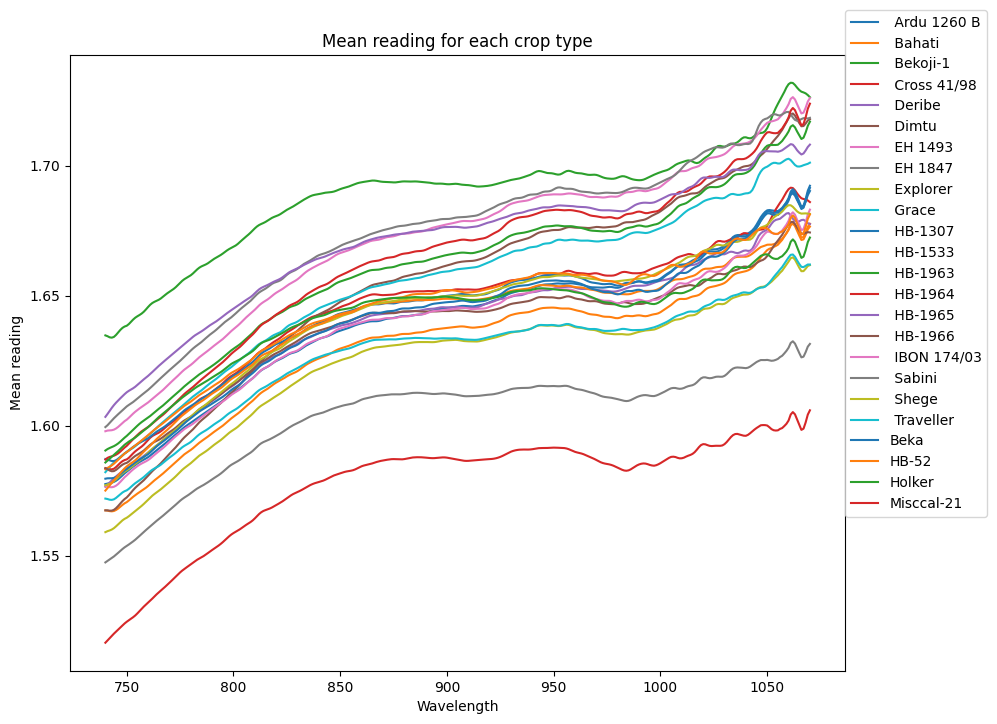

In [228]:
plt.figure(figsize=(10, 8))
for i in range(0,mean_df.shape[0]):
    Y = mean_df.iloc[i]
    X = mean_df.columns.astype(int)
    plt.plot(X, Y, label=Y.name)

plt.xlabel('Wavelength')
plt.ylabel('Mean reading')
plt.title('Mean reading for each crop type')
plt.savefig('./plots/eda_mean_read.png')

plt.legend(loc=(1, 0.25))
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_values = scaler.fit_transform(mean_df)
mean_df_standardized = pd.DataFrame(standardized_values, columns=mean_df.columns)
mean_df_standardized.index = mean_df.index

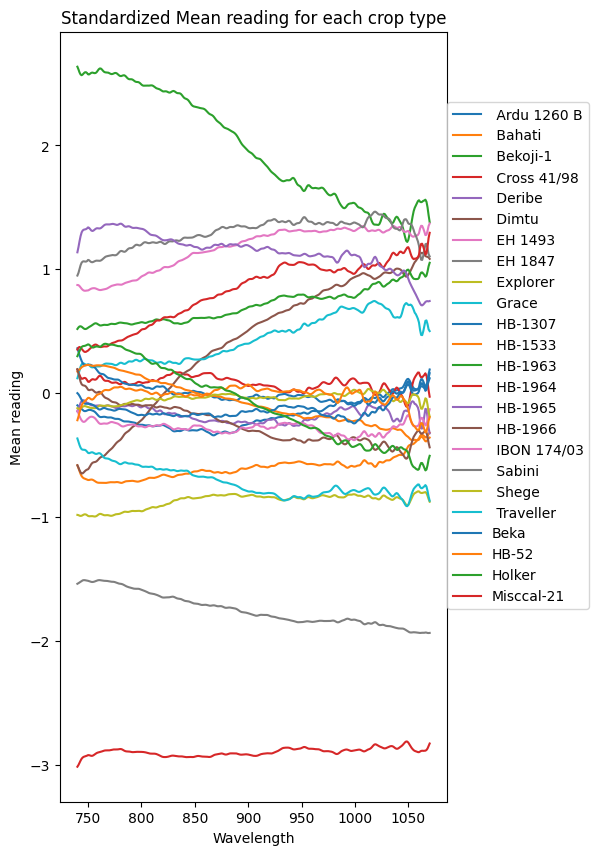

In [53]:
plt.figure(figsize=(5, 10))
for i in range(0,mean_df_standardized.shape[0]):
    Y = mean_df_standardized.iloc[i]
    X = mean_df_standardized.columns.astype(int)
    plt.plot(X, Y, label=Y.name)

plt.xlabel('Wavelength')
plt.ylabel('Mean reading')
plt.title('Standardized Mean reading for each crop type')

plt.legend(loc=(1, 0.25))
plt.show()

In [ ]:
df['Compiled'] = None
for i in range(df.shape[0]):
    df['Compiled'][i] = df.drop(['ePred','Predictor'],axis=1).iloc[i].tolist()

In [10]:
df['Compiled'] # Contains array of all readings for that row

0       [1.499853245, 1.500665151, 1.50156444, 1.50253...
1       [1.530877159, 1.531669295, 1.53252414, 1.53341...
2       [1.607174812, 1.608641515, 1.610044201, 1.6113...
3       [1.677333102, 1.678098347, 1.678929613, 1.6798...
4       [1.507829724, 1.509293037, 1.51068256, 1.51197...
                              ...                        
1195    [1.515609471, 1.515503183, 1.515349146, 1.5153...
1196    [1.627892549, 1.62769916, 1.627423927, 1.62723...
1197    [1.479373423, 1.478922094, 1.478520215, 1.4783...
1198    [1.679693491, 1.679629519, 1.679437796, 1.6792...
1199    [1.525251061, 1.525224265, 1.525088499, 1.5250...
Name: Compiled, Length: 1200, dtype: object

In [11]:
base_df = df.drop(['Predictor','Compiled'],axis=1)

In [12]:
columns = base_df.columns.tolist()
columns = [columns[-1]] + columns[:-1]
base_df = base_df[columns]
base_df

ePred       740       741       742       743       744       745   
0        21  1.499853  1.500665  1.501564  1.502536  1.503537  1.504548  \
1        21  1.530877  1.531669  1.532524  1.533419  1.534308  1.535169   
2        21  1.607175  1.608642  1.610044  1.611357  1.612540  1.613585   
3        21  1.677333  1.678098  1.678930  1.679809  1.680688  1.681539   
4        21  1.507830  1.509293  1.510683  1.511977  1.513145  1.514180   
...     ...       ...       ...       ...       ...       ...       ...   
1195      5  1.515609  1.515503  1.515349  1.515305  1.515476  1.515926   
1196      5  1.627893  1.627699  1.627424  1.627232  1.627236  1.627507   
1197      5  1.479373  1.478922  1.478520  1.478309  1.478369  1.478747   
1198      5  1.679693  1.679630  1.679438  1.679292  1.679319  1.679598   
1199      5  1.525251  1.525224  1.525088  1.525010  1.525110  1.525462   

           746       747       748  ...      1061      1062      1063   
0     1.505588  1.506689  1.507828  ...  1.636411  1.637350  1.636452  \
1     1.536024  1.536916  1.537830  ...  1.643299  1.644222  1.643302   
2     1.614534  1.615456  1.616359  ...  1.703343  1.704291  1.703329   
3     1.682384  1.683260  1.684145  ...  1.755067  1.756013  1.754996   
4     1.515125  1.516049  1.516964  ...  1.641968  1.642877  1.641946   
...        ...       ...       ...  ...       ...       ...       ...   
1195  1.516625  1.517550  1.518595  ...  1.672215  1.673189  1.672358   
1196  1.628022  1.628764  1.629627  ...  1.750373  1.751284  1.750319   
1197  1.479403  1.480310  1.481359  ...  1.655338  1.656332  1.655537   
1198  1.680113  1.680854  1.681719  ...  1.806144  1.807077  1.806074   
1199  1.526050  1.526860  1.527793  ...  1.669312  1.670247  1.669384   

          1064      1065      1066      1067      1068      1069      1070  
0     1.634370  1.632287  1.630265  1.630722  1.633166  1.636204  1.637872  
1     1.641195  1.639088  1.637046  1.637493  1.639938  1.642981  1.644649  
2     1.701137  1.698946  1.696822  1.697278  1.699806  1.702953  1.704677  
3     1.752716  1.750441  1.748238  1.748696  1.751290  1.754525  1.756294  
4     1.639829  1.637714  1.635664  1.636101  1.638535  1.641567  1.643227  
...        ...       ...       ...       ...       ...       ...       ...  
1195  1.670419  1.668529  1.666615  1.667106  1.669576  1.672746  1.674657  
1196  1.748206  1.746154  1.744086  1.744544  1.747080  1.750356  1.752320  
1197  1.653643  1.651795  1.649922  1.650428  1.652891  1.656046  1.657951  
1198  1.803889  1.801769  1.799633  1.800103  1.802719  1.806098  1.808125  
1199  1.667420  1.665508  1.663575  1.664047  1.666496  1.669646  1.671542  

[1200 rows x 332 columns]

In [57]:
scaler = StandardScaler()
standardized_values = scaler.fit_transform(base_df.drop('ePred',axis=1))
base_df_standardized = pd.DataFrame(standardized_values, columns=base_df.drop('ePred',axis=1).columns)
base_df_standardized['ePred'] = base_df.ePred
base_df_standardized

740       741       742       743       744       745       746   
0    -1.083339 -1.078229 -1.071235 -1.063988 -1.057706 -1.053023 -1.049097  \
1    -0.661671 -0.656340 -0.649414 -0.642713 -0.637568 -0.634650 -0.633004   
2     0.375345  0.391059  0.406783  0.420400  0.430571  0.436745  0.440295   
3     1.328917  1.336192  1.345336  1.354135  1.361026  1.365214  1.367869   
4    -0.974925 -0.960825 -0.947002 -0.935194 -0.926513 -0.921422 -0.918717   
...        ...       ...       ...       ...       ...       ...       ...   
1195 -0.869185 -0.876320 -0.883421 -0.889810 -0.894685 -0.897565 -0.898209   
1196  0.656935  0.650386  0.643579  0.636942  0.631224  0.626974  0.624694   
1197 -1.361695 -1.374097 -1.385209 -1.394456 -1.401325 -1.405547 -1.407064   
1198  1.360998  1.357028  1.352260  1.347076  1.342332  1.338688  1.336827   
1199 -0.738139 -0.744041 -0.750724 -0.757426 -0.763158 -0.767271 -0.769357   

           747       748       749  ...      1062      1063      1064   
0    -1.045144 -1.040598 -1.035535  ... -0.814245 -0.815015 -0.823558  \
1    -0.631669 -0.629896 -0.627611  ... -0.703131 -0.704184 -0.713240   
2     0.442688  0.445067  0.447758  ...  0.268195  0.267082  0.255677   
3     1.370189  1.372976  1.376155  ...  1.104549  1.103076  1.089409   
4    -0.917110 -0.915539 -0.913619  ... -0.724874 -0.726122 -0.735311   
...        ...       ...       ...  ...       ...       ...       ...   
1195 -0.896572 -0.893201 -0.888922  ... -0.234722 -0.234042 -0.240844   
1196  0.624730  0.626689  0.629773  ...  1.028091  1.027400  1.016512   
1197 -1.405984 -1.402928 -1.398726  ... -0.507302 -0.506215 -0.512017   
1198  1.337281  1.339769  1.343518  ...  1.930263  1.929545  1.916588   
1199 -0.769219 -0.767295 -0.764341  ... -0.282295 -0.282157 -0.289322   

          1065      1066      1067      1068      1069      1070  ePred  
0    -0.833786 -0.844450 -0.841565 -0.826035 -0.805516 -0.793550     21  
1    -0.724044 -0.735310 -0.732505 -0.716608 -0.695655 -0.683571     21  
2     0.241709  0.226813  0.230358  0.250754  0.276610  0.290622     21  
3     1.072535  1.054378  1.058459  1.082653  1.112675  1.128312     21  
4    -0.746216 -0.757561 -0.754926 -0.739276 -0.718569 -0.706644     21  
...        ...       ...       ...       ...       ...       ...    ...  
1195 -0.249045 -0.259391 -0.255581 -0.237700 -0.213096 -0.196567      5  
1196  1.003369  0.987555  0.991591  1.014634  1.045087  1.063821      5  
1197 -0.519029 -0.528072 -0.524190 -0.507302 -0.483848 -0.467697      5  
1198  1.900664  1.881603  1.886396  1.913667  1.948774  1.969471      5  
1199 -0.297785 -0.308311 -0.304852 -0.287471 -0.263353 -0.247122      5  

[1200 rows x 332 columns]

In [13]:
base_df.columns

Index(['ePred', '740', '741', '742', '743', '744', '745', '746', '747', '748',
       ...
       '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069',
       '1070'],
      dtype='object', length=332)

In [233]:
from sklearn.manifold import TSNE

feature_cols = base_df.columns[1:] 

n_dimen = 3
tsne = TSNE(n_components=n_dimen, random_state=42, verbose=1)
tsne_result = tsne.fit_transform(base_df[feature_cols])

dimen_cols = [f'Dimension {i}' for i in range(1,n_dimen+1)]
tsne_df = pd.DataFrame(data=tsne_result, columns=dimen_cols)
tsne_df['ePred'] = base_df['ePred']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.002s...
[t-SNE] Computed neighbors for 1200 samples in 0.114s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 0.072879
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.168491
[t-SNE] KL divergence after 1000 iterations: 0.291792


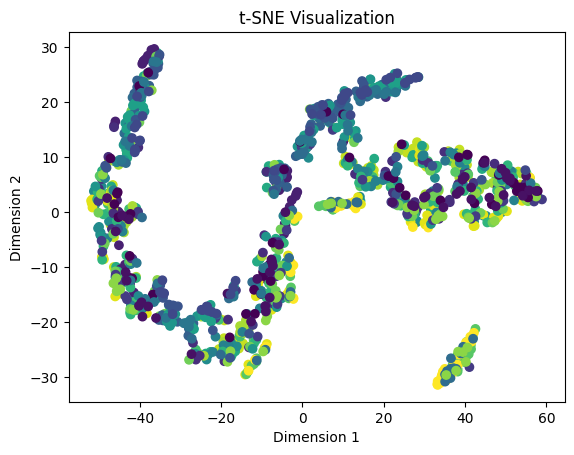

In [231]:
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['ePred'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

In [234]:
tsne_df.to_pickle('pickle_objects/tsne3d.pkl')

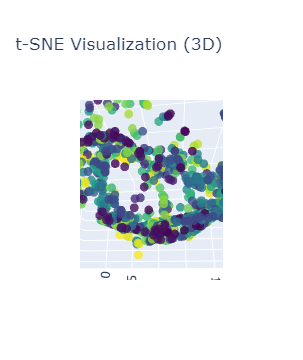

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter3d(
    x=tsne_df['Dimension 1'],
    y=tsne_df['Dimension 2'],
    z=tsne_df['Dimension 3'],
    mode='markers',
    marker=dict(
        size=5,
        color=tsne_df['ePred'],
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ),
    title='t-SNE Visualization (3D)'
)

fig.show()

In [238]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
import lightgbm as lgb

feature_cols = base_df_standardized.drop('ePred',axis=1).columns
target = base_df['ePred']

X_train, X_test, y_train, y_test = train_test_split(base_df_standardized[feature_cols], target, test_size=0.3, random_state=42)


print("Fitting model...")
base_model = xgb.XGBClassifier(n_estimators = 50, n_jobs = -1)  
#base_model = lgb.LGBMClassifier(n_estimators=50, n_jobs=-1)  

base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)
print("Done!")

Fitting model...
Done!


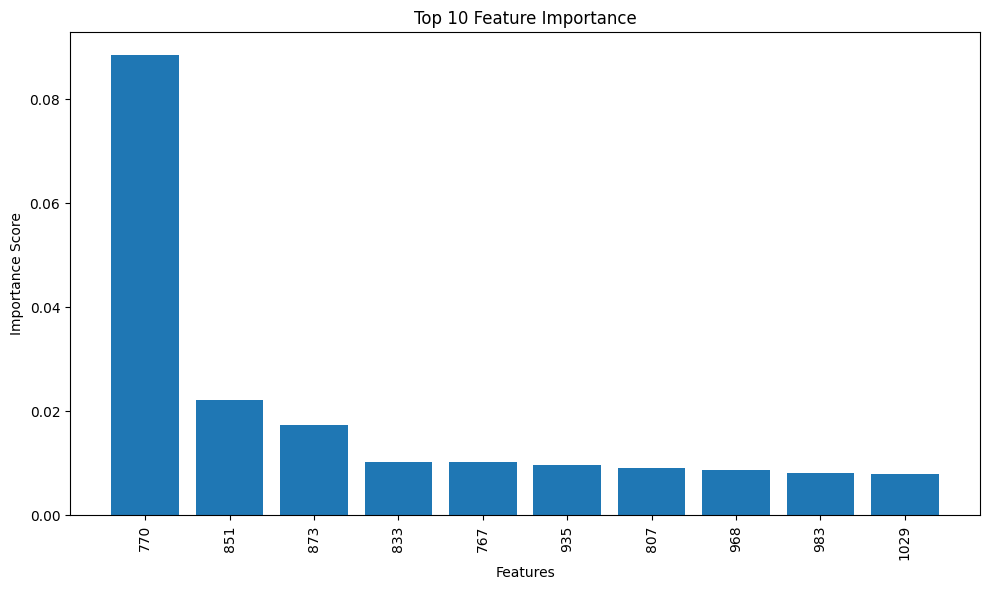

In [239]:
# feature importance scores
importance_scores = base_model.feature_importances_
feature_names = X_train.columns

sorted_indices = np.argsort(importance_scores)[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_names = feature_names[sorted_indices]

# top n features
top_k = 10
top_scores = sorted_scores[:top_k]
top_names = sorted_names[:top_k]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_scores)), top_scores, tick_label=top_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.savefig('./plots/xgb_init_featimp.png')
plt.show()

Accuracy score: 0.2861111111111111


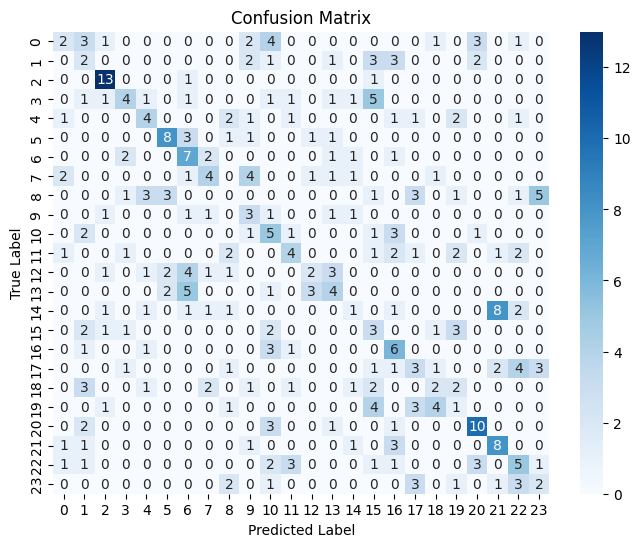

In [240]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy score: {accuracy}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('./plots/xgb_init_cm.png')
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.manifold import TSNE
import xgboost as xgb


dimension_sizes = [2, 3]

accuracies = []
c_matrices = []
for n_components in dimension_sizes:
    print(f"Reducing to {n_components} dimensions...")
    tsne = TSNE(n_components=n_components, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train)
    X_test_tsne = tsne.fit_transform(X_test)
    print(f"Fitting with {n_components} dimensions...")
    #model = xgb.XGBClassifier(n_estimators = 50, n_jobs = -1)  
    model = lgb.LGBMClassifier(n_estimators=50, n_jobs=-1)  
    model.fit(X_train_tsne, y_train)
    y_pred = model.predict(X_test_tsne)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracies.append(accuracy)
    c_matrices.append(conf_matrix)

Reducing to 2 dimensions...
Fitting with 2 dimensions...
Reducing to 3 dimensions...
Fitting with 3 dimensions...


[0.05277777777777778, 0.05277777777777778]


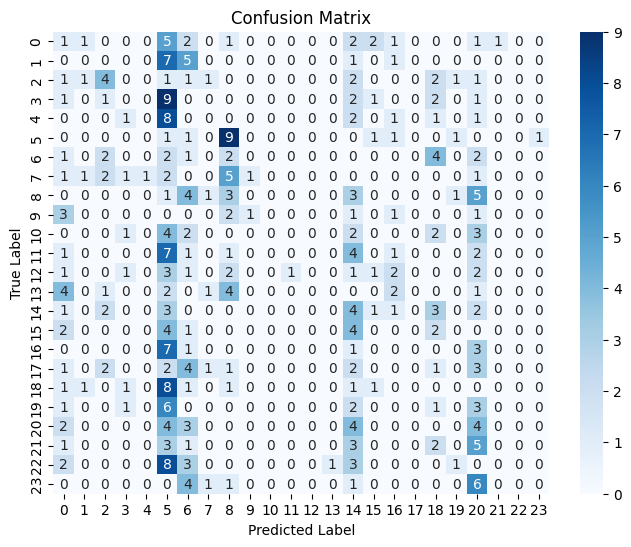

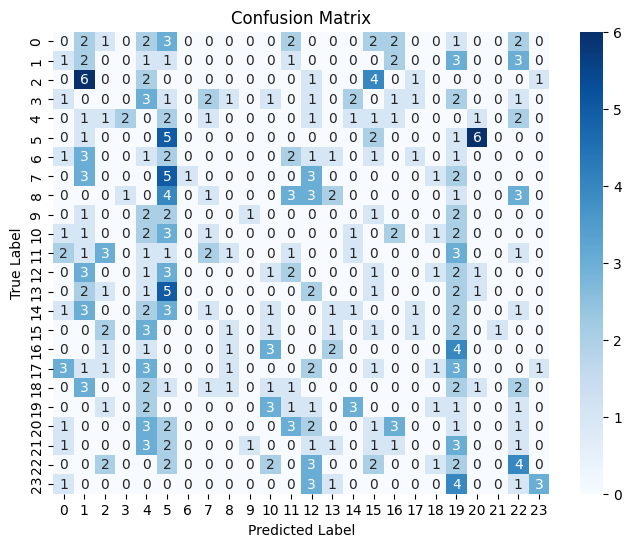

In [61]:
print(accuracies)
for matrix in c_matrices:
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

## PCA

In [66]:
def evaluate_data(X_train, y_train, X_test, y_test):
    print("Fitting model...")
    model = xgb.XGBClassifier(n_estimators = 50, n_jobs = -1)  
    #base_model = lgb.LGBMClassifier(n_estimators=50, n_jobs=-1)  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Done!")
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Accuracy and confusion matrix
    print(f"Accuracy score: {accuracy}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # feature importance scores
    importance_scores = model.feature_importances_
    feature_names = X_train.columns

    sorted_indices = np.argsort(importance_scores)[::-1]
    sorted_scores = importance_scores[sorted_indices]
    sorted_names = feature_names[sorted_indices]

    # top n features
    top_k = 10
    top_scores = sorted_scores[:top_k]
    top_names = sorted_names[:top_k]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_scores)), top_scores, tick_label=top_names)
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.title('Top 10 Feature Importance')
    plt.tight_layout()
    plt.show()

Fitting model...
Done!
Accuracy score: 0.2861111111111111


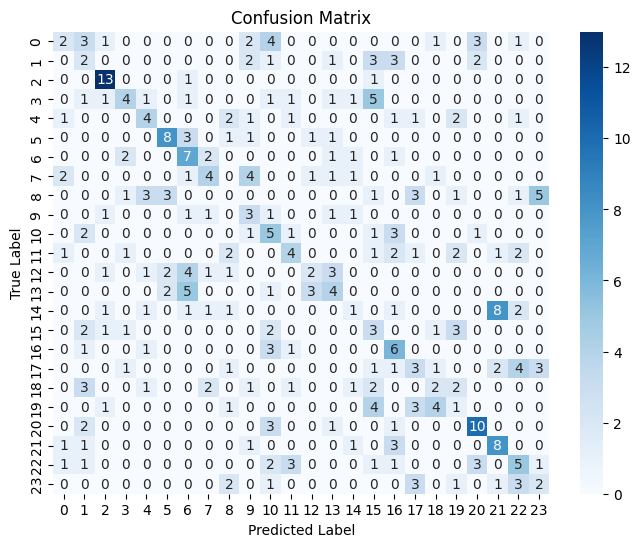

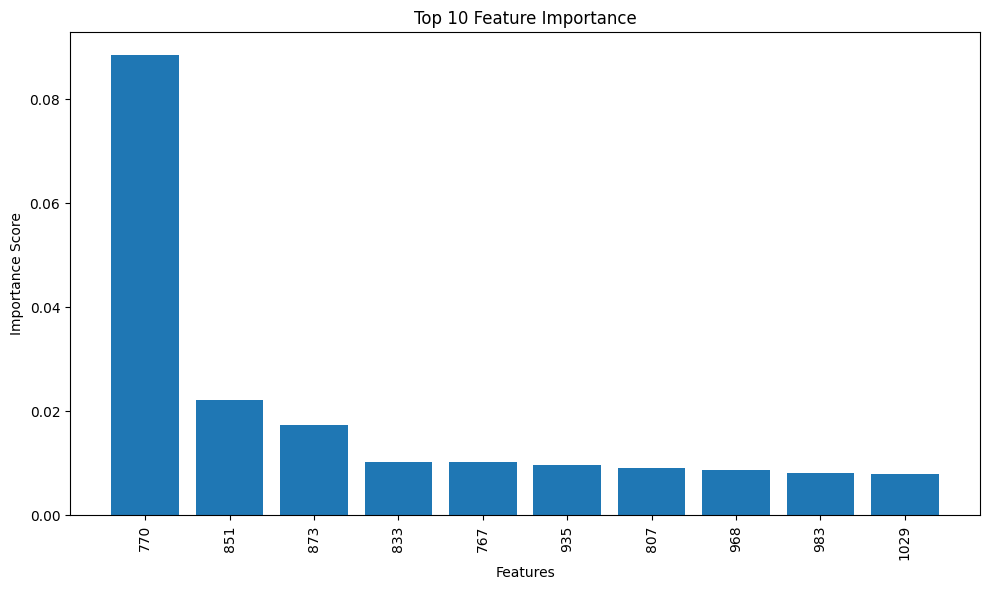

In [67]:
evaluate_data(X_train, y_train, X_test, y_test)

## Obtaining first derivative of data
Taking the first derivative of the data enables us to correct for baseline differences in the scans, and highlight the major sources of variation between the different scans. Numerical derivatives are generally unstable, so we use the smoothing filter implemented in scipy.signal, [savgol_filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) to smooth the derivative data out.
Idea acknowledgement: https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/

In [95]:
from scipy.signal import savgol_filter
target = base_df['ePred']
X_train, X_test, y_train, y_test = train_test_split(base_df_standardized[feature_cols], target, test_size=0.3, random_state=42)

X_dx = savgol_filter(base_df_standardized[feature_cols], 
                     window_length=25, 
                     polyorder = 5, 
                     deriv=1)

X_train_deriv, X_test_deriv, _, _ = train_test_split(X_dx, target, test_size=0.3, random_state=42)

In [98]:
X_train_deriv.shape

(840, 331)

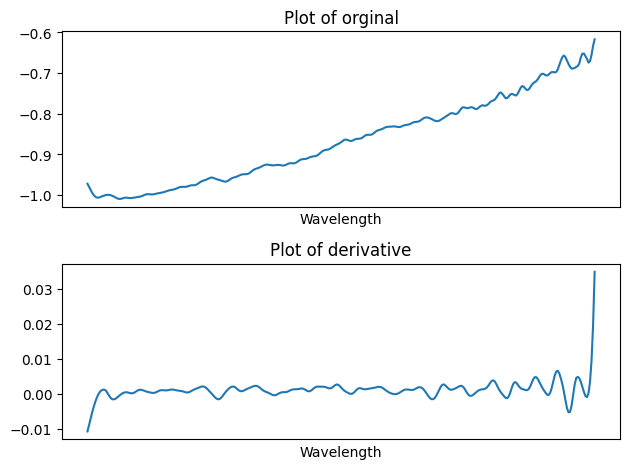

In [244]:
plt.subplot(2, 1, 1)  # Create the second subplot
Y = X_train.iloc[0]
X = [i for i in range(len(Y))]
plt.plot(X, Y)
plt.xlabel('Wavelength')
plt.title('Plot of orginal')
plt.xticks([])

plt.subplot(2, 1, 2)  # Create the first subplot
dY = X_train_deriv[0]
dX = [i for i in range(len(dY))]
plt.plot(dX, dY)
plt.xlabel('Wavelength')
plt.title('Plot of derivative')
plt.xticks([]) 

plt.tight_layout()
plt.savefig('./plots/differentiate.png')
plt.show()

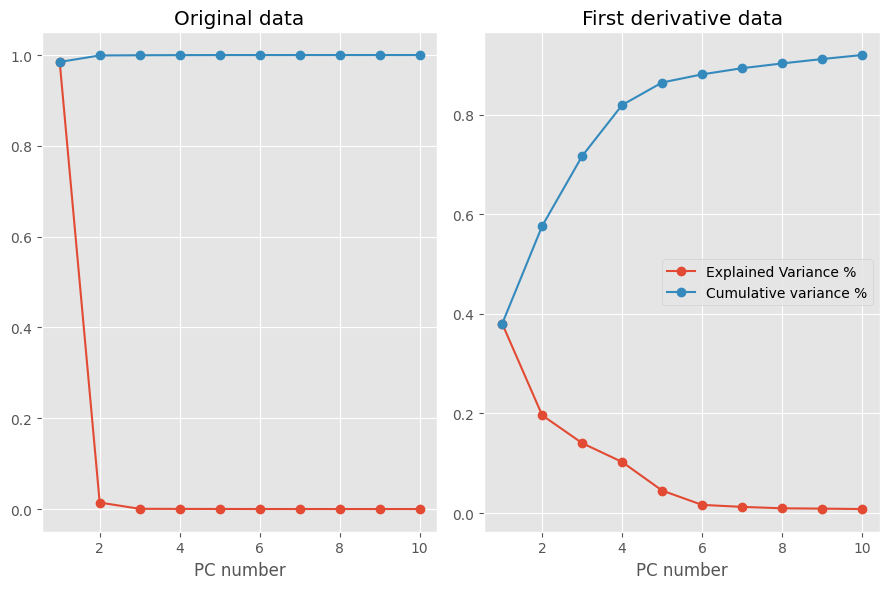

In [247]:
# Code acknowledgements: https://nirpyresearch.com/classification-nir-spectra-principal-component-analysis-python/
from sklearn.decomposition import PCA as pca
from sklearn import svm

nc = 10 # number of components
pca1 = pca(n_components=nc)
pca2 = pca(n_components=nc)

nfeat1 = X_train # Original data already standardized
nfeat2 = StandardScaler().fit_transform(X_train_deriv)
 
# Fit the spectral data and extract the explained variance ratio
X1 = pca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_
 
# Fit the first data and extract the explained variance ratio
X2 = pca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_
 
# Plot data
pc_array = np.linspace(1,nc,nc)
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax1.plot(pc_array, expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(pc_array, np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Original data')
 
    ax2.plot(pc_array, expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(pc_array, np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
 
    plt.legend()
    plt.savefig('./plots/cumulvarpercent.png')
    plt.show()

In [101]:
pca2 = pca(n_components=6)
 
# Transform on the scaled features
Xt2 = pca2.fit_transform(nfeat2)

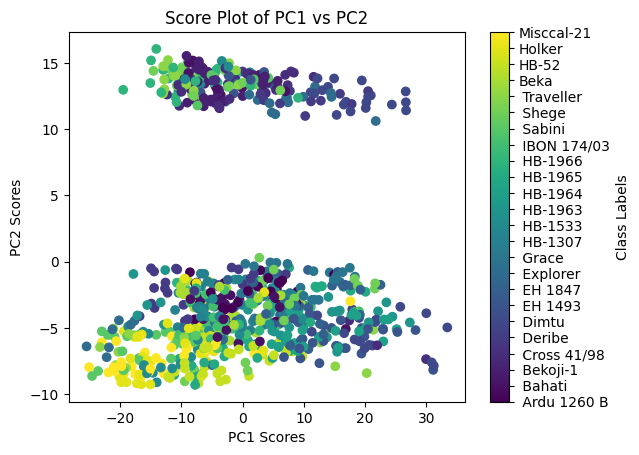

In [248]:
pc1_scores = Xt2[:, 0]
pc2_scores = Xt2[:, 1]
pc3_scores = Xt2[:, 2]

# scatter plot of the scores
scatter = plt.scatter(pc1_scores, pc2_scores, c=y_train)
plt.xlabel('PC1 Scores')
plt.ylabel('PC2 Scores')
plt.title('Score Plot of PC1 vs PC2')

cbar = plt.colorbar(scatter, ticks=list(label_mapping.keys()))
cbar.set_ticklabels(list(label_mapping.values()))
cbar.set_label('Class Labels')

plt.savefig('./plots/2dpca.png')
plt.show()

In [251]:
import pickle
with open('pickle_objects/pcscores.pkl', 'wb') as file:
    pickle.dump(Xt2, file)

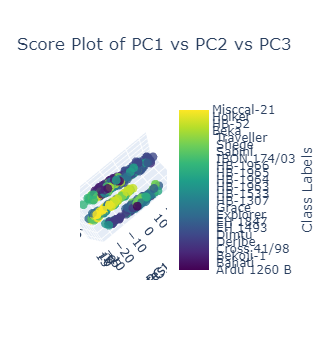

In [113]:
import plotly.graph_objects as go

pc1_scores = Xt2[:, 0]
pc2_scores = Xt2[:, 1]
pc3_scores = Xt2[:, 2]

fig = go.Figure(data=go.Scatter3d(
    x=pc1_scores,
    y=pc2_scores,
    z=pc3_scores,
    mode='markers',
    marker=dict(
        size=5,
        color=y_train,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title='Class Labels',
            titleside='right',
            tickvals=list(label_mapping.keys()),
            ticktext=list(label_mapping.values())
        )
    )
))

# Set axis labels and title
fig.update_layout(scene=dict(
    xaxis_title='PC1 Scores',
    yaxis_title='PC2 Scores',
    zaxis_title='PC3 Scores',
    ),
    title='Score Plot of PC1 vs PC2 vs PC3'
)

# Show the plot
fig.show()

In [123]:
df_pca = pd.DataFrame(Xt2, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca['Target'] = y_train.tolist()

df_pca

PC1        PC2        PC3       PC4       PC5       PC6  Target
0     9.248056  -2.413057  -5.189787 -3.038594 -0.133821  0.025461      10
1   -10.459943  12.860866  -1.025812  2.406506 -0.405924  0.170557      11
2    -4.223459  12.386252  -2.903746  3.667858 -2.177013  7.778566       2
3    -9.729062  13.204508  -0.892132  1.143973 -1.004996 -2.773350      19
4    14.225703  -0.819477  15.390907 -2.701885 -0.725780  0.751363       9
..         ...        ...        ...       ...       ...       ...     ...
835   4.181644  -1.238278  15.782022 -7.580181  1.393994 -0.042462       0
836  11.334159  -2.887191  -4.457909 -4.441659  0.357361 -2.002787       9
837   6.059333  -3.431903  -5.724552 -5.310379 -1.727310 -0.144015       1
838   4.743809  -6.229246  -9.084147 -0.451460 -4.078346 -0.677176      13
839  -3.129062  -4.353515  -7.366095 -4.734274 -3.335775 -1.436961       1

[840 rows x 7 columns]

In [124]:
scaled_X_test_deriv = StandardScaler().fit_transform(X_test_deriv)
PCtest = pca2.fit_transform(scaled_X_test_deriv)

df_pca_test = pd.DataFrame(PCtest, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca_test['Target'] = y_test.tolist()
df_pca_test

PC1        PC2       PC3        PC4       PC5       PC6  Target
0    23.911037  -4.177163 -5.066133  -0.890024 -3.449084  0.980667       5
1     9.629055  -3.273051 -8.078902   2.949287 -2.643944 -0.008507      13
2    -7.267855  12.028835  0.438737  -5.886403  2.204327  5.785598       2
3   -18.181180  -6.919288  2.756232  -2.493479 -0.389532 -3.916787      17
4    -4.112085  -9.440693  7.410919 -10.426637 -1.656395  2.208937      14
..         ...        ...       ...        ...       ...       ...     ...
355   8.744610  -6.474756  6.592046  -7.620140 -3.919208  2.121992      21
356  -6.996561  -4.801395 -7.526477   0.818115  3.134106 -0.099297      20
357  -6.047957  12.921760 -0.056455  -4.120254  2.893549  4.616075       2
358  20.590448  12.426681  2.474910  -1.361866 -5.849044 -1.579826       4
359  -5.388093  -6.297683  3.643907  -3.633903 -5.388194  4.448838      14

[360 rows x 7 columns]

In [126]:
pca_Xtrain, pca_ytrain = df_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']], df_pca.Target
pca_Xtest, pca_ytest = df_pca_test[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']], df_pca_test.Target

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score

results = []
confusion_matrices = []
roc_auc = []

print("Fitting XGBoost...")
xgb_model = xgb.XGBClassifier()
xgb_model.fit(pca_Xtrain, pca_ytrain)
xgb_accuracy = xgb_model.score(pca_Xtest, pca_ytest)
xgb_y_pred = xgb_model.predict(pca_Xtest)
xgb_conf_matrix = confusion_matrix(pca_ytest, xgb_y_pred)
xgb_roc_auc = roc_auc_score(pca_ytest, xgb_model.predict_proba(pca_Xtest), multi_class='ovr')

roc_auc.append(xgb_roc_auc)
results.append(xgb_accuracy)
confusion_matrices.append(xgb_conf_matrix)


print("Fitting RandomForest...")
rf_model = RandomForestClassifier()
rf_model.fit(pca_Xtrain, pca_ytrain)
rf_accuracy = rf_model.score(pca_Xtest, pca_ytest)
rf_y_pred = rf_model.predict(pca_Xtest)
rf_conf_matrix = confusion_matrix(pca_ytest, rf_y_pred)
rf_roc_auc = roc_auc_score(pca_ytest, rf_model.predict_proba(pca_Xtest), multi_class='ovr')

roc_auc.append(rf_roc_auc)
results.append(rf_accuracy)
confusion_matrices.append(rf_conf_matrix)


print("Fitting Logistic Regression...")
lr_model = LogisticRegression()
lr_model.fit(pca_Xtrain, pca_ytrain)
lr_accuracy = lr_model.score(pca_Xtest, pca_ytest)
lr_y_pred = lr_model.predict(pca_Xtest)
lr_conf_matrix = confusion_matrix(pca_ytest, lr_y_pred)
lr_roc_auc = roc_auc_score(pca_ytest, lr_model.predict_proba(pca_Xtest), multi_class='ovr')

roc_auc.append(lr_roc_auc)
results.append(lr_accuracy)
confusion_matrices.append(lr_conf_matrix)


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print(f"Fitting SVM ({kernel.capitalize()})...")
    svm_model = SVC(kernel=kernel, probability=True)
    svm_model.fit(pca_Xtrain, pca_ytrain)
    svm_accuracy = svm_model.score(pca_Xtest, pca_ytest)
    svm_y_pred = svm_model.predict(pca_Xtest)
    svm_conf_matrix = confusion_matrix(pca_ytest, svm_y_pred)
    svm_roc_auc = roc_auc_score(pca_ytest, svm_model.predict_proba(pca_Xtest), multi_class='ovr')
    
    roc_auc.append(svm_roc_auc)
    results.append(svm_accuracy)
    confusion_matrices.append(svm_conf_matrix)

Fitting XGBoost...
Fitting RandomForest...
Fitting Logistic Regression...
Fitting SVM (Linear)...


/home/mrdot/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fitting SVM (Poly)...
Fitting SVM (Rbf)...
Fitting SVM (Sigmoid)...


In [138]:
model_names = ['xgb', 'rf', 'lr', 'svmlinear', 'svmpoly', 'svmrbf', 'svmsigmoid']

df_results = pd.DataFrame({'Model': model_names, 'Accuracy': results, 'ROC AUC': roc_auc})

print(df_results)

        Model  Accuracy   ROC AUC
0         xgb  0.191667  0.760918
1          rf  0.205556  0.828097
2          lr  0.125000  0.690199
3   svmlinear  0.136111  0.735308
4     svmpoly  0.175000  0.787634
5      svmrbf  0.211111  0.810854
6  svmsigmoid  0.147222  0.757742


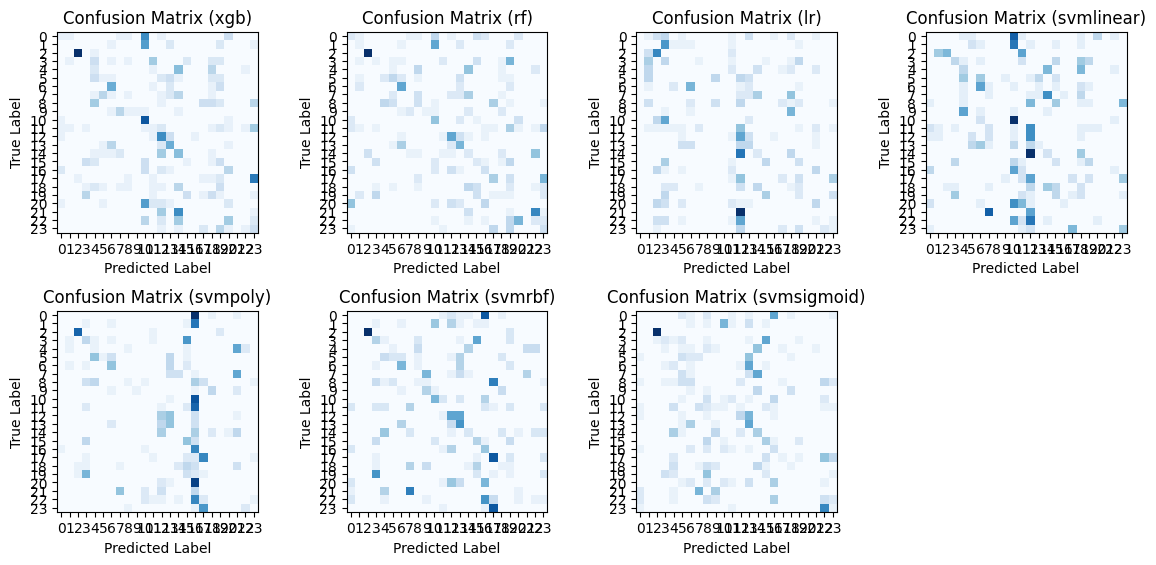

In [221]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.tight_layout(pad=3.0)

for i, ax in enumerate(axes.flat):
    if i < len(confusion_matrices):
        plotcm = confusion_matrices[i]
        ax.imshow(plotcm, cmap='Blues')
        ax.set_title(f"Confusion Matrix ({model_names[i]})")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        tick_labels = list(set(df_pca.Target))
        ax.set_xticks(range(len(tick_labels)))
        ax.set_yticks(range(len(tick_labels)))
        ax.set_xticklabels(tick_labels)
        ax.set_yticklabels(tick_labels)
    else:
        ax.axis('off')

plt.show()

Performing GridSearch...
Done!


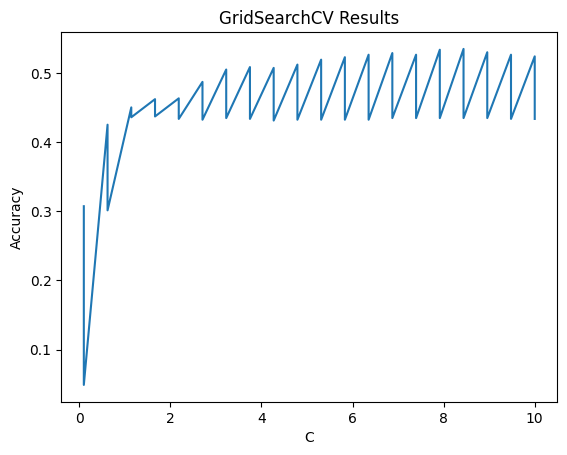

In [194]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.linspace(0.1, 10, 20),
              'kernel': ['rbf'],
              'gamma': ['scale', 'auto']}

svm_model = SVC(probability=True)

print("Performing GridSearch...")
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(pca_Xtrain, pca_ytrain)
print("Done!")

# extract the grid search results
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']
param_C = results['param_C']

plt.plot(param_C, mean_scores)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('GridSearchCV Results')
plt.show()

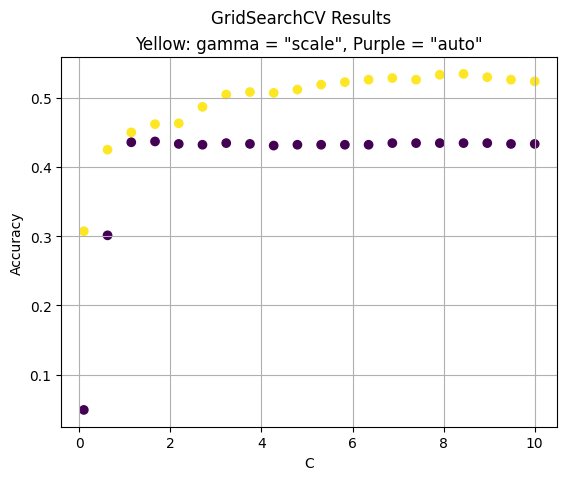

In [195]:
plt.scatter(param_C, mean_scores, c=[1 if x == 'scale' else 0 for x in results['param_gamma'].data])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.suptitle('GridSearchCV Results')
plt.title('Yellow: gamma = "scale", Purple = "auto"')
plt.grid(True)
plt.savefig('./plots/gridsearch_results_initial_tune.png')
plt.show()

In [196]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

svm_model = SVC(**best_params, probability=True)
svm_model.fit(pca_Xtrain, pca_ytrain)

accuracy = svm_model.score(pca_Xtest, pca_ytest)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.14166666666666666


In [197]:
best_params

{'C': 8.436842105263159, 'gamma': 'scale', 'kernel': 'rbf'}

In [204]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
}


xgb_model = xgb.XGBClassifier(n_jobs=-1)

print("Performing random search...")
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=20, cv=3)
random_search.fit(pca_Xtrain, pca_ytrain)
print("Done!")

best_params = random_search.best_params_
best_scores = random_search.best_score_

# Save the best 5 parameter combinations
top_params = random_search.cv_results_['params'][:5]

print("Best Parameters:")
print(best_params)
print("Best Scores:")
print(best_scores)

Performing random search...
Done!
Best Parameters:
{'subsample': 0.7, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best Scores:
0.469047619047619


{'subsample': 0.7, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best Scores:
0.469047619047619

In [205]:
random_search.cv_results_

{'mean_fit_time': array([28.48029892]),
 'std_fit_time': array([1.99554834]),
 'mean_score_time': array([0.01399771]),
 'std_score_time': array([0.00355197]),
 'param_subsample': masked_array(data=[0.7],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[300],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[4],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_colsample_bytree': masked_array(data=[0.7],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'subsample': 0.7,
   'n_estimators': 300,
   'max_depth': 4,
   'learning_rate': 0.1,
   'colsample_bytree': 0.7}],
 'split0_test_score': array([0.53571429]),
 'split1_test_score': array([0.4

## Random search implementation from scratch

In [208]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import random
import itertools

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
}


xgb_model = xgb.XGBClassifier(n_jobs=-1)


n_iter = 20

print("Performing random search...")

tqdm._instances.clear()

pbar = tqdm(total=n_iter, desc='Random Search Progress')


best_results = []


for _ in range(n_iter):
    # random sample param
    params = {param: random.choice(values) for param, values in param_grid.items()}
    xgb_model.set_params(**params)
    
    scores = cross_val_score(xgb_model, pca_Xtrain, pca_ytrain, cv=3, scoring='accuracy')
    mean_score = np.mean(scores)
    
    result = {'params': params, 'score': mean_score}
    
    best_results.append(result)
    best_results.sort(key=lambda x: x['score'], reverse=True)
    
    # Keep only the top 5 resulats
    best_results = best_results[:5]

    pbar.update(1)

pbar.close()

print("Done!")

print("Best 5 Results and Parameters:")
for i, result in enumerate(best_results):
    print(f"Rank {i+1}: Score = {result['score']}, Parameters = {result['params']}")

Performing random search...


Random Search Progress: 100%|███████████████████████████████████████████████████████████| 20/20 [13:17<00:00, 39.88s/it]

Done!
Best 5 Results and Parameters:
Rank 1: Score = 0.4892857142857143, Parameters = {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.7}
Rank 2: Score = 0.4845238095238095, Parameters = {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'subsample': 0.9, 'colsample_bytree': 0.5}
Rank 3: Score = 0.48333333333333334, Parameters = {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'subsample': 0.9, 'colsample_bytree': 0.7}
Rank 4: Score = 0.48333333333333334, Parameters = {'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.2, 'subsample': 0.9, 'colsample_bytree': 0.5}
Rank 5: Score = 0.48214285714285715, Parameters = {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1, 'subsample': 0.7, 'colsample_bytree': 0.5}


In [225]:
from sklearn.metrics import confusion_matrix
top_params = [result['params'] for result in best_results[:3]]

accuraciesxgb = []
cmxgb = []
rocxgb = []
for i, params in enumerate(top_params):
    print(f"Testing Top Parameter Combination {i+1}")
    xgb_model.set_params(**params)
    xgb_model.fit(pca_Xtrain, pca_ytrain)
    y_pred = xgb_model.predict(pca_Xtest)
    
    accuracy = xgb_model.score(pca_Xtest, pca_ytest)
    print(f"Accuracy: {accuracy}")
    accuraciesxgb.append(accuracy)
    
    conf_matrix = confusion_matrix(pca_ytest, y_pred)
    print("Confusion Matrix:")
    cmxgb.append(conf_matrix)
    
    # Calculate and display ROC AUC score
    y_pred_proba = xgb_model.predict_proba(pca_Xtest)
    roc_auc = roc_auc_score(pca_ytest, y_pred_proba, multi_class='ovr')
    rocxgb.append(roc_auc)
    print(f"ROC AUC Score: {roc_auc}")
    print()

Testing Top Parameter Combination 1
Accuracy: 0.20833333333333334
Confusion Matrix:
ROC AUC Score: 0.7774944633095447

Testing Top Parameter Combination 2
Accuracy: 0.21944444444444444
Confusion Matrix:
ROC AUC Score: 0.8093393839144022

Testing Top Parameter Combination 3
Accuracy: 0.20277777777777778
Confusion Matrix:
ROC AUC Score: 0.7651429351541029

